In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

## random forest on iris dataset

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris=load_iris()

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df=sns.load_dataset('iris')

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
x=df.drop('species',axis=1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [14]:
df['species']=df['species'].map({'setosa':0,'versicolor':1,'virginica':2})

In [18]:
y=df['species']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
random=RandomForestClassifier(n_estimators=20,random_state=0)

In [23]:
random.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [25]:
y_pred=random.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [29]:
random.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=209652396),
 DecisionTreeClassifier(max_features='sqrt', random_state=398764591),
 DecisionTreeClassifier(max_features='sqrt', random_state=924231285),
 DecisionTreeClassifier(max_features='sqrt', random_state=1478610112),
 DecisionTreeClassifier(max_features='sqrt', random_state=441365315),
 DecisionTreeClassifier(max_features='sqrt', random_state=1537364731),
 DecisionTreeClassifier(max_features='sqrt', random_state=192771779),
 DecisionTreeClassifier(max_features='sqrt', random_state=1491434855),
 DecisionTreeClassifier(max_features='sqrt', random_state=1819583497),
 DecisionTreeClassifier(max_features='sqrt', random_state=530702035),
 DecisionTreeClassifier(max_features='sqrt', random_state=626610453),
 DecisionTreeClassifier(max_features='sqrt', random_state=1650906866),
 DecisionTreeClassifier(max_features='sqrt', random_state=1879422756),
 DecisionTreeClassifier(max_features='sqrt', random_state=1277901399),
 DecisionTree

[Text(0.39705882352941174, 0.9166666666666666, 'x[0] <= 5.75\ngini = 0.657\nsamples = 77\nvalue = [49, 32, 39]'),
 Text(0.11764705882352941, 0.75, 'x[3] <= 0.8\ngini = 0.398\nsamples = 40\nvalue = [47, 16, 1]'),
 Text(0.058823529411764705, 0.5833333333333334, 'gini = 0.0\nsamples = 29\nvalue = [47, 0, 0]'),
 Text(0.17647058823529413, 0.5833333333333334, 'x[3] <= 1.6\ngini = 0.111\nsamples = 11\nvalue = [0, 16, 1]'),
 Text(0.11764705882352941, 0.4166666666666667, 'gini = 0.0\nsamples = 10\nvalue = [0, 16, 0]'),
 Text(0.23529411764705882, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6764705882352942, 0.75, 'x[3] <= 1.75\ngini = 0.457\nsamples = 37\nvalue = [2, 16, 38]'),
 Text(0.47058823529411764, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.55\nsamples = 16\nvalue = [2, 14, 9]'),
 Text(0.35294117647058826, 0.4166666666666667, 'x[3] <= 0.7\ngini = 0.231\nsamples = 11\nvalue = [2, 13, 0]'),
 Text(0.29411764705882354, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [2,

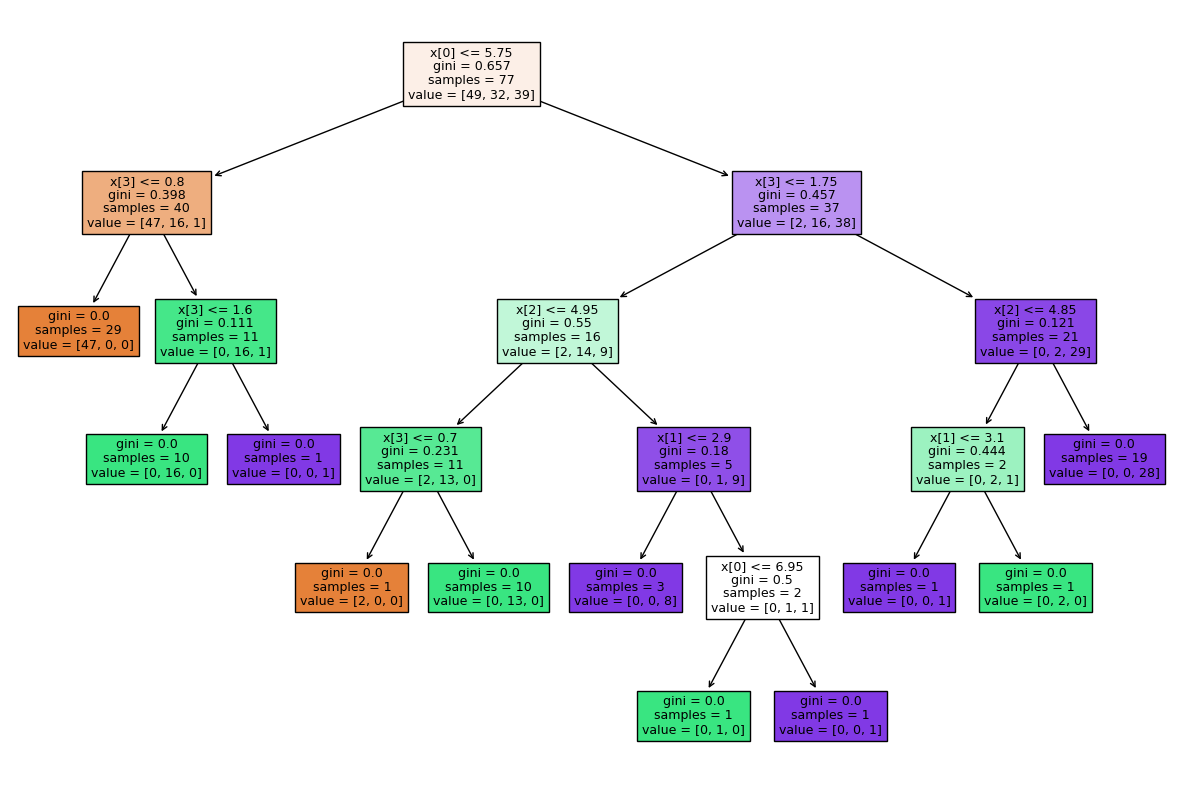

In [30]:
plt.figure(figsize=(15,10))
tree.plot_tree(random.estimators_[2],filled=True)

In [31]:
from sklearn import metrics

In [32]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [33]:
metrics.accuracy_score(y_test,y_pred)

1.0

## Decision tree on  KYPHOSIS DATASET 

In [35]:
df =pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [37]:
df['Kyphosis']=df['Kyphosis'].map({'absent':0,'present':1})

In [38]:
df.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [39]:
df.Kyphosis.value_counts()

0    64
1    17
Name: Kyphosis, dtype: int64

In [40]:
df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [42]:
x=df.drop('Kyphosis',axis=1)

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [43]:
y=df['Kyphosis']

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=99)

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
decision=DecisionTreeClassifier()

In [51]:
from sklearn import metrics

In [53]:
metrics.accuracy_score(y_test,y_pred)

0.8235294117647058

In [54]:
parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5,6],
    'max_features':['auto','sqrt','log2']
}

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
tunning=GridSearchCV(decision,param_grid=parameter,cv=5,scoring='accuracy')

In [57]:
tunning.fit(x_train,y_train)

D:\ANACONDA FILES\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\ANACONDA FILES\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\ANACONDA FILES\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\ANACONDA FILES\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\ANACONDA FILES\lib\site-packages\

D:\ANACONDA FILES\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\ANACONDA FILES\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\ANACONDA FILES\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\ANACONDA FILES\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\ANACONDA FILES\lib\site-packages\

D:\ANACONDA FILES\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\ANACONDA FILES\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\ANACONDA FILES\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\ANACONDA FILES\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\ANACONDA FILES\lib\site-packages\

D:\ANACONDA FILES\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\ANACONDA FILES\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\ANACONDA FILES\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\ANACONDA FILES\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\ANACONDA FILES\lib\site-packages\

D:\ANACONDA FILES\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\ANACONDA FILES\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\ANACONDA FILES\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [58]:
tunning.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [60]:
pred=tunning.predict(x_test)

In [61]:
from sklearn import metrics

In [62]:
metrics.accuracy_score(y_test,pred)

0.8823529411764706

## RANDOM FOREST ON kyphosis dataset

In [64]:
df=pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [70]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [71]:
x=df.drop('Kyphosis',axis=1)

In [72]:
y=df['Kyphosis']

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
classifier=RandomForestClassifier(n_estimators=10,random_state=0)

In [77]:
classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [78]:
classifier.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=209652396),
 DecisionTreeClassifier(max_features='sqrt', random_state=398764591),
 DecisionTreeClassifier(max_features='sqrt', random_state=924231285),
 DecisionTreeClassifier(max_features='sqrt', random_state=1478610112),
 DecisionTreeClassifier(max_features='sqrt', random_state=441365315),
 DecisionTreeClassifier(max_features='sqrt', random_state=1537364731),
 DecisionTreeClassifier(max_features='sqrt', random_state=192771779),
 DecisionTreeClassifier(max_features='sqrt', random_state=1491434855),
 DecisionTreeClassifier(max_features='sqrt', random_state=1819583497),
 DecisionTreeClassifier(max_features='sqrt', random_state=530702035)]

In [81]:
pred=classifier.predict(x_test)
pred

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent'], dtype=object)

In [82]:
from sklearn import metrics

In [83]:
metrics.accuracy_score(y_test,pred)

0.8235294117647058

In [84]:
from sklearn import tree

[Text(0.4583333333333333, 0.9285714285714286, 'x[0] <= 103.5\ngini = 0.285\nsamples = 39\nvalue = [53, 11]'),
 Text(0.25, 0.7857142857142857, 'x[2] <= 7.5\ngini = 0.05\nsamples = 23\nvalue = [38, 1]'),
 Text(0.16666666666666666, 0.6428571428571429, 'x[1] <= 4.5\ngini = 0.278\nsamples = 4\nvalue = [5, 1]'),
 Text(0.08333333333333333, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [4, 0]'),
 Text(0.25, 0.5, 'x[0] <= 27.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.6428571428571429, 'gini = 0.0\nsamples = 19\nvalue = [33, 0]'),
 Text(0.6666666666666666, 0.7857142857142857, 'x[1] <= 5.5\ngini = 0.48\nsamples = 16\nvalue = [15, 10]'),
 Text(0.5, 0.6428571428571429, 'x[2] <= 9.0\ngini = 0.305\nsamples = 12\nvalue = [13, 3]'),
 Text(0.4166666666666667, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0

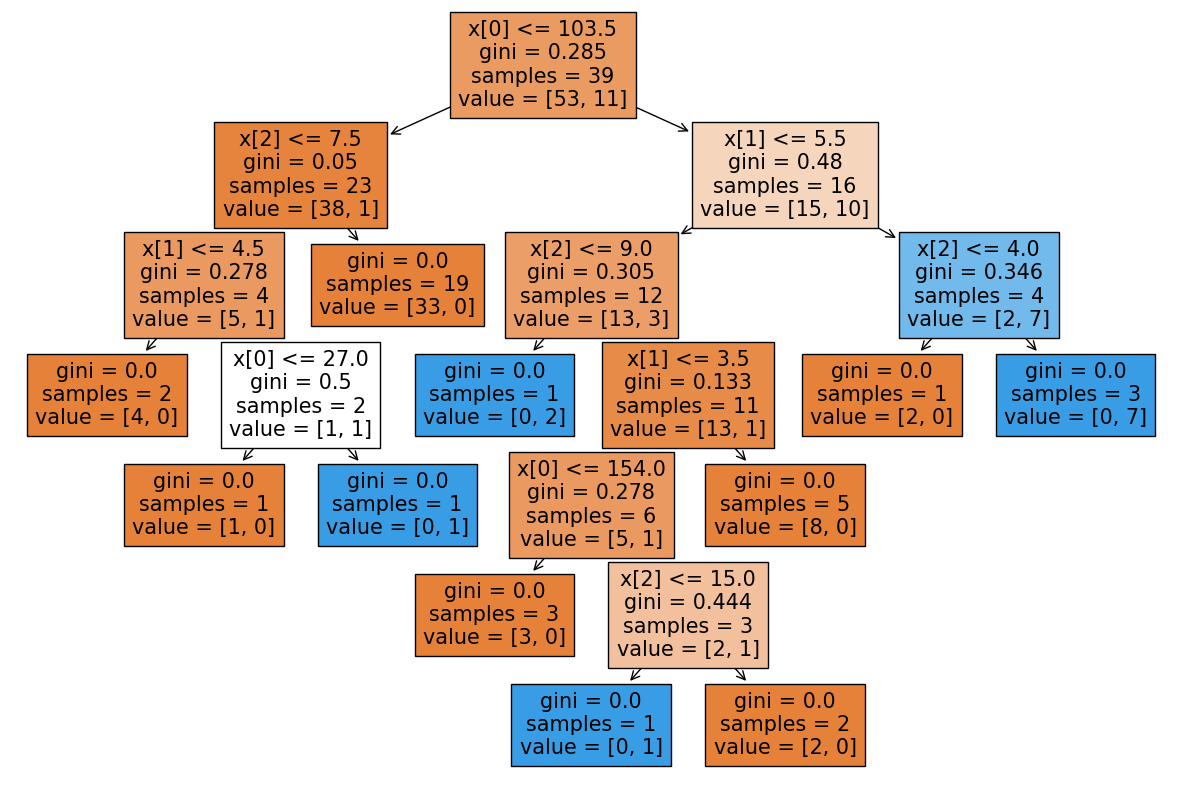

In [85]:
plt.figure(figsize=(15,10))
tree.plot_tree(classifier.estimators_[2],filled=True)